This notebook uses Julia and [DynamicalSystems.jl](https://juliadynamics.github.io/DynamicalSystems.jl/latest/) to reproduce some of the results from [1].

[1] Gray, Casey (2002) "An Analysis of the Belousov-Zhabotinskii Reaction," Rose-Hulman Undergraduate Mathematics Journal: Vol. 3 : Iss. 1 , Article 1. 
Available at: https://scholar.rose-hulman.edu/rhumj/vol3/iss1/1

In [9]:
using DynamicalSystems
using PyPlot

In [2]:
function loop(u, p, t)
    x,y,z = u; ϵ,δ,q,f = p
    dx = (q*y - x*y + x*(1-x))/ϵ
    dy = (-q*y - x*y + f*z)/δ
    dz = x - z
    return SVector{3}(dx, dy, dz)
end

initial = rand(3)
system = ContinuousDynamicalSystem(loop, initial, [4e-2, 4e-4, 8e-4, 0.5126445])

3-dimensional continuous dynamical system
 state:       [0.739479, 0.748854, 0.0230223]
 e.o.m.:      loop
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.04, 0.0004, 0.0008, 0.512644]

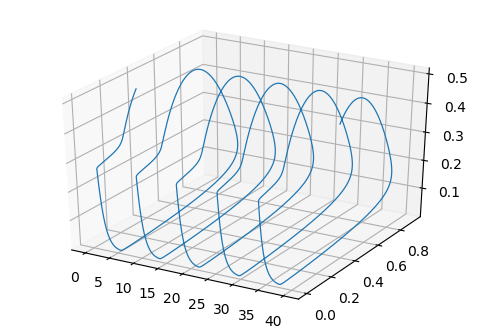

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13a4e6e10>

In [14]:
figure(figsize=(6,4))
t=0:0.001:40.0

tr = trajectory(system, 40.0, dt=0.001, Ttr=10.0)
x,y,z = columns(tr)
plot3D(t,x,z;lw=0.9)

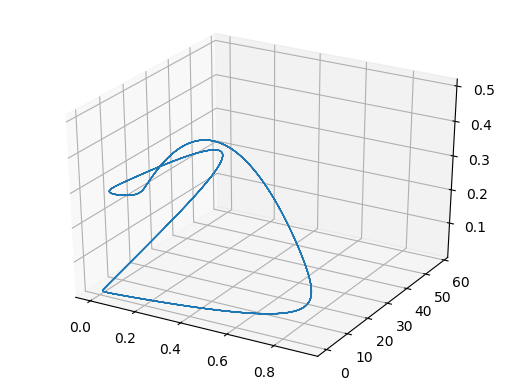

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13d1de7b8>

In [15]:
plot3D(x,y,z;lw=0.9)

In [16]:
lyapunovs(system, 2000.0; Ttr=50)

3-element Array{Float64,1}:
   34.28621605097858
   20.76098453468752
 -Inf               